# Part 3: Joining Data

## Imports

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

from utils import export

## Join Part 1 and Part 2 data to create a new dataframe

In [2]:
dirname = '../data/'
stations_df = pd.read_csv(dirname + 'stations_clean.csv', sep=',', index_col=False)
yelp_places_df = pd.read_csv(dirname + 'yelp_places_clean.csv', sep=',', index_col=False)
yelp_categories_df = pd.read_csv(dirname + 'yelp_categories_clean.csv', sep=',', index_col=False)

In [3]:
stations_df.sample(5)

,station_id,name,latitude,longitude,altitude,slots,free_bikes,empty_slots
23,72991751fac2544c78666c0554568ef5,S25 - Plaza de Armas,-33.437118,-70.649512,578.0,18,13,5
91,f9e8b1b5a737986055b0201924ebeae5,LC011 - Metro Hernando De Magallanes,-33.408329,-70.556524,709.0,19,6,13
54,1dfc2cf6a191dda80abb266ead1fc4d3,S09 - Santo Domingo / Morandé,-33.436620,-70.654184,566.0,19,10,9
148,d4eca963247bd7c88276eef1295a563c,LC098 - Cantagallo,-33.373503,-70.518313,810.0,7,4,3
109,44ebcf45bc2f09921966535464f6231b,LC058 - Plaza Horacio Rivarola,-33.421136,-70.570168,667.0,15,14,1


In [4]:
yelp_places_df.sample(5)

,yelp_id,name,review_count,price,rating,distance,station_id
3777,AkPKfH2jTSdWyZgHXJotBA,Restaurant de Comida Peruana Las Américas,1,NaN,3.0,477.714927,0046f093db7125380956ca0bbf51c8bd
6156,D4VeYaSEw9EaNCxqkloL6A,Normandie,12,3.0,3.9,1251.109302,4b67bf22ade79451105e4cbb80e60dc9
9909,GP6fzGX_n8-AEVWkXredcw,Dominó,7,1.0,4.1,1214.010401,781f96b7e332067821ec87a594fb180b
49,Vs8LLb7gguxoW2fmDQrusQ,El Polluelo Amarillo,10,2.0,3.7,812.784903,e1593acef03a0fd770595370586bc358
3413,BdFa1mzW_Hyt3EJ8EqnV1Q,Juan Maestro,1,NaN,5.0,835.862506,961fadb450cb81b500afb4d88241eccc


In [5]:
yelp_categories_df.sample(5)

,yelp_id,category_name
1986,ZSv6Z3QtlNqVz9IHwGEpow,desserts
1507,VtpPlrg60knU_mONrELrBw,food stands
430,_-JGJI8948wEpYAhSjuo-A,italian
924,ctjBMhazaAgUaDul0OCokw,peruvian
2261,pz9SrLHngKMwSYR9MKCHvw,parks


Are there any station_ids that are in `stations_df` but not in `yelp_places_df`? (Spoiler: there shouldn't be!)

In [6]:
station_ids = set(stations_df['station_id'].to_list())
yelp_station_ids = set(yelp_places_df['station_id'].to_list())
station_ids.issubset(yelp_station_ids), yelp_station_ids.issubset(station_ids)

(True, True)

The sets of station_ids in `stations_df` and `yelp_places_df` are equal. Therefore, I'll (inner) merge (*i.e.* SQL join) these two tables on `station_id`. But, first, I'll rename a pair of columns to avoid future confusion.

In [7]:
stations_df.rename({'name': 'station_name'}, axis='columns', inplace=True)
yelp_places_df.rename({'name': 'place_name'}, axis='columns', inplace=True)

In [8]:
stations_places_df = stations_df.merge(yelp_places_df, how='inner', on='station_id')

In [9]:
stations_places_df.sample(5)

,station_id,station_name,latitude,longitude,altitude,slots,free_bikes,empty_slots,yelp_id,place_name,review_count,price,rating,distance
5735,17db4c1637f146f9820d00e8a8a9f656,LC042 - Padre Hurtado / Las Condes,-33.394415,-70.544959,740.0,11,4,6,YSu8SCf9U3xssfysZrR94Q,Al Jazeera,1,NaN,4.0,724.119593
3668,f53dcce8aa6dad42c91ac44153dba370,LC092 - Manquehue Sur / El Director,-33.412750,-70.566300,686.0,11,4,7,aST1yQNM-AfI9HgIjIOwdQ,La Tasca Altamar,8,NaN,4.0,595.998791
5836,8845a95b2ea7a9ccde5110a7dbe6c0b4,S24 - Plaza Yungay,-33.439127,-70.673451,540.0,18,5,13,nD0SDE0k1cHkfAHF0HmYZg,Yahaira,2,1.0,4.5,606.926991
8134,2de9be273aba3e100286c2ad96a1b2ae,LC094 - Sánchez Fontecilla / Martín De Zamora,-33.424679,-70.592277,637.0,7,4,3,PiO0A-NzFTPMOpodH_DsEA,Castaño,1,NaN,5.0,1232.755468
6051,45d51e231d79a803aa7b2d1a41d1fc3f,P45 - Eliodoro Yañez / Holanda,-33.429568,-70.600625,620.0,14,2,11,oZ_pVyyyGS8mghqZ9X_NUw,Baco,71,3.0,4.3,1322.197252


Next, I could merge `stations_places_df` with `yelp_categories_df` on `yelp_id`.

Are there any yelp_ids that are in `stations_places_df` that are not in `yelp_categories_df`? It's certainly possible that there are businesses returned by a Yelp search that don't have any associated categories.

In [10]:
yelp_ids_1 = set(stations_places_df['yelp_id'].to_list())
yelp_ids_2 = set(yelp_categories_df['yelp_id'].to_list())
print(f'num yelp IDs: {len(yelp_ids_1)}, {len(yelp_ids_2)}')
print(f'yelp_ids_2 contained in yelp_ids_1: {yelp_ids_2.issubset(yelp_ids_1)}')
yelp_id_diff = yelp_ids_1 - yelp_ids_2
print('yelp IDs in yelp_id_1 but not in yelp_id_2:')
for id in yelp_id_diff:
    print(f'    {id}')

num yelp IDs: 1756, 1748
yelp_ids_2 contained in yelp_ids_1: True
yelp IDs in yelp_id_1 but not in yelp_id_2:
    S3qk-oT76pT6G_VA4Y4j0w
    g79bELS1rZheFdxkXmzKtw
    05SHJ9668PZQXIhMjp9ACA
    JX_Axp2MRPwmDhHUw0hZqw
    6XnJsC8OZyLuRoWN9wRmEA
    pLh6ImLqAWPWNICWUz70Uw
    JcJrUd2jyEGUCYU99QtkUA
    B45kBL6rxN7G2udwz2epQw


To ensure that I keep all businesses in the final merged DataFrame, I'll left merge stations_places_df to yelp_categories_df.  

In [11]:
stations_places_cats_df =\
    stations_places_df.merge(yelp_categories_df, how='left', on='yelp_id')

### Look at the data before and after the join to validate your data

In [12]:
stations_places_cats_df.head()

,station_id,station_name,latitude,longitude,altitude,slots,free_bikes,empty_slots,yelp_id,place_name,review_count,price,rating,distance,category_name
0,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,wine bars
1,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,chilean
2,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,cocktail bars
3,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,U15KdCy6HH05WISNtN9plQ,Restaurant Peumayén,73,4.0,4.5,856.161401,latin american
4,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,y2FR-JBGie4wiW6RjtKLhg,Aquí Está Coco,58,4.0,4.3,1099.691315,seafood


In [13]:
print(f'shape: {stations_places_cats_df.shape}')
print(f'columns:\n {stations_places_cats_df.columns}')
print(f'dtypes:\n {stations_places_cats_df.dtypes}')

shape: (15212, 15)
columns:
 Index(['station_id', 'station_name', 'latitude', 'longitude', 'altitude',
       'slots', 'free_bikes', 'empty_slots', 'yelp_id', 'place_name',
       'review_count', 'price', 'rating', 'distance', 'category_name'],
      dtype='object')
dtypes:
 station_id        object
station_name      object
latitude         float64
longitude        float64
altitude         float64
slots              int64
free_bikes         int64
empty_slots        int64
yelp_id           object
place_name        object
review_count       int64
price            float64
rating           float64
distance         float64
category_name     object
dtype: object


In [14]:
export(stations_places_cats_df, 'stations_places_cats.csv')

### EDA with visualizations

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

#### `stations_df` 

I'll start off easy by looking at the columns of `stations_df` for interesting relationships pertaining to the number of bikes available.

array([[<Axes: title={'center': 'free_bikes'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'altitude'}>],
       [<Axes: title={'center': 'slots'}>,
        <Axes: title={'center': 'empty_slots'}>]], dtype=object)

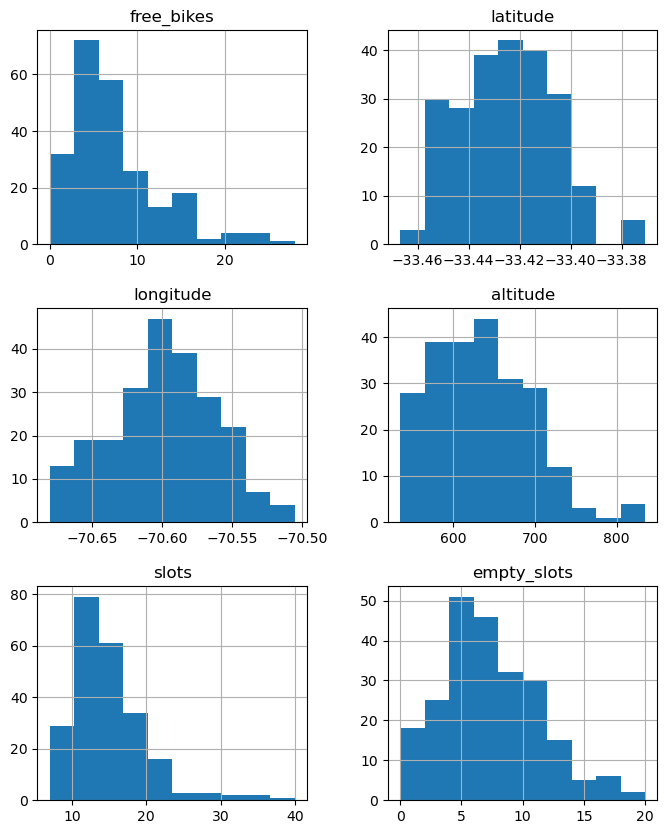

In [35]:
cols = ['free_bikes', 'latitude', 'longitude', 'altitude', 'slots', 'empty_slots']
stations_df[cols].hist(figsize=(8, 10))

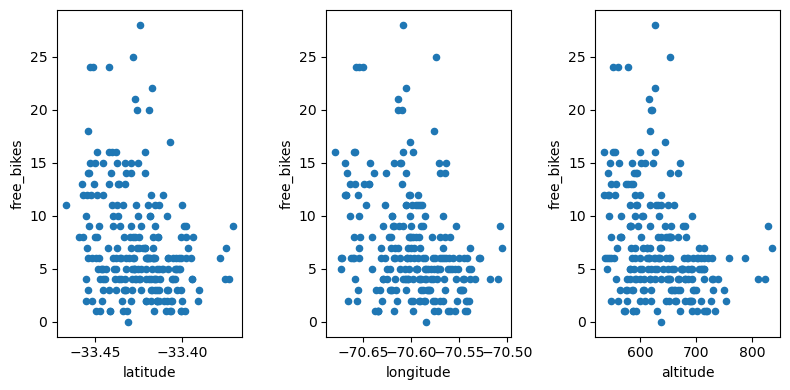

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
stations_df.plot.scatter(x='latitude', y='free_bikes', ax=axes[0])
stations_df.plot.scatter(x='longitude', y='free_bikes', ax=axes[1])
stations_df.plot.scatter(x='altitude', y='free_bikes', ax=axes[2])
fig.tight_layout()

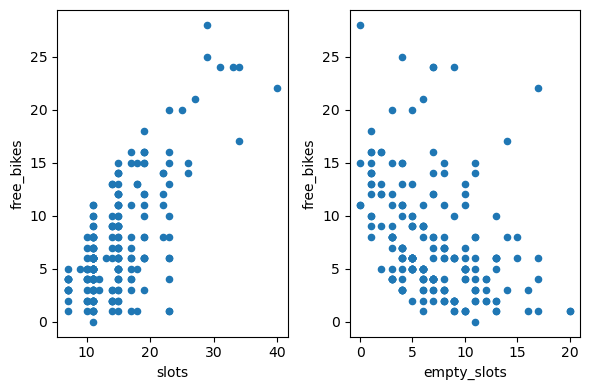

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
stations_df.plot.scatter(x='slots', y='free_bikes', ax=axes[0])
stations_df.plot.scatter(x='empty_slots', y='free_bikes', ax=axes[1])
fig.tight_layout()

<Axes: >

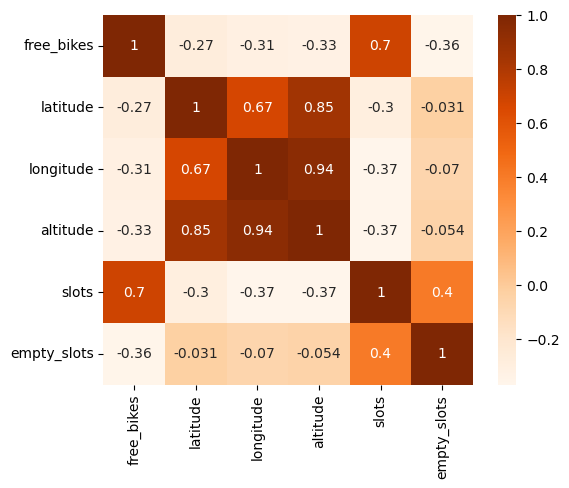

In [47]:
sns.heatmap(stations_df[cols].corr(), annot=True, square=True, cmap='Oranges')

#### Conclusions

Restricting attention to the columns of `stations_df`, the number of free bikes is moderately/strongly correlated with slots suggesting that, at larger bike stations, there is a higher chance of a bike being available. That seems pretty reasonable. I thought there would be a stronger negative correlation between the number of free bikes and altitude: my hunch was that people would be less likely to return bikes to high-altitude bike stations because they didn't want to cycle uphill. That doesn't seem to be the case however.

#### `stations_places_cats_df`

Next, I'll look for nontrivial relationships between the number of free bikes at a station and the number of nearby points of interest.

# Database

### Put results in an SQLite database

In [15]:
# Define a SQLite connection and cursor.
# Note that dirname was defined above.
con = sqlite3.connect(dirname + 'stations_places_cats.db')
cur = con.cursor()

In [16]:
stations_places_cats_df.dtypes

station_id        object
station_name      object
latitude         float64
longitude        float64
altitude         float64
slots              int64
free_bikes         int64
empty_slots        int64
yelp_id           object
place_name        object
review_count       int64
price            float64
rating           float64
distance         float64
category_name     object
dtype: object

In [17]:
# Define the SQLite table creation command before executing it.
sql_create_cmd = r"""
    CREATE TABLE stations_places_cats (
        station_id TEXT,
        station_name TEXT,
        latitude REAL,
        longitude REAL,
        altitude REAL,
        slots INTEGER,
        free_bikes INTEGER,
        empty_slots INTEGER,
        yelp_id TEXT,
        place_name TEXT,
        review_count INTEGER,
        price REAL,
        rating REAL,
        distance REAL,
        category_name TEXT
    );
"""
print(sql_create_cmd)


    CREATE TABLE stations_places_cats (
        station_id TEXT,
        station_name TEXT,
        latitude REAL,
        longitude REAL,
        altitude REAL,
        slots INTEGER,
        free_bikes INTEGER,
        empty_slots INTEGER,
        yelp_id TEXT,
        place_name TEXT,
        review_count INTEGER,
        price REAL,
        rating REAL,
        distance REAL,
        category_name TEXT
    );



In [18]:
cur.execute('DROP TABLE IF EXISTS stations_places_cats')
cur.execute(sql_create_cmd)

In [19]:
res = cur.execute('SELECT name FROM sqlite_master')
res.fetchone()

('stations_places_cats',)

I've successfully created a database. But it's empty. To fill it:

In [20]:
def sql_insert_cmd(df: pd.DataFrame, db: str, row: int) -> str:
    """
    Return the SQL command that will insert a DataFrame row into the database.
    """
    row_list = df.loc[row, :].to_list()
    row_str = str(row_list).replace('nan', 'NULL').replace('[', '(').replace(']', ')')
    return 'INSERT INTO ' + db + ' VALUES ' + row_str

In [21]:
for row in range(stations_places_cats_df.shape[0]):
    sql_cmd = sql_insert_cmd(stations_places_cats_df, 'stations_places_cats', row)
    cur.execute(sql_cmd)

In [22]:
con.commit()

I'll verify that inserting into the database woked as expected.

In [23]:
res = cur.execute('SELECT * FROM stations_places_cats')
records = res.fetchall()
print(f'num rows: {len(records)}, num cols: {len(records[0])}')
records[0]

num rows: 15212, num cols: 15


('e1593acef03a0fd770595370586bc358',
 'P31 - Estación Canal 13',
 -33.428334,
 -70.627312,
 599.0,
 13,
 6,
 7,
 '8N6Y3HsLXHBeFwhlO0YxwQ',
 'Barrica 94',
 78,
 2.0,
 4.3,
 988.6312698678696,
 'wine bars')

Phew!